In [1]:
# 畳み込みニューラルネットワークを利用した画像認識

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import cifar10
#import google.colab.drive # drive file
#google.colab.drive.mount('gdrive')

Using TensorFlow backend.


In [2]:
# cifarデータの読み込み
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# 入力画像を変換
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)    # Keras入力形式に変換
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255     # 各画素を0から1に正規化
X_test = X_test.astype('float32') /255

# 出力形式を変換 (6 ⇒ [0,0,0,0,0,0,1,0,0,0] に)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('X_train shape:', X_train.shape)      # X_trainの配列形状
print('Y_train shape:', Y_train.shape)      # Y_trainの配列形状
#print('y_train shape:', y_train.shape)      # Y_trainの配列形状
print(X_train.shape[0], 'train samples')    # 訓練サンプル数
print(X_test.shape[0], 'test samples')      # 評価サンプル数

170500096/170498071 [==============================] - 11s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
50000 train samples
10000 test samples


[4]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


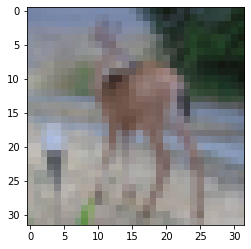

In [3]:

plt.imshow(X_test[100])    # 入力画像の例を表示
plt.gray()
print(y_test[100])     # 正解データ (ラベル)
print(Y_test[100])     # 正解データ (確率の配列)

In [4]:
# CNNのモデルの作成
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

"""
# 追加 # 0.6310999989509583
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
"""

# 
model.add(Flatten())
model.add(Dense(1024, activation='relu')) # 1024だけだと７２% # Dense１０２４ 畳込１２８チャネル化 73% #64→１２８→２５６ ７２%  # 1024 ３２→６４ drop追加 74% # 1024 Dropout0.25 74%  #Dense1024 bach 256 79% # Dense1024 bach 512 # 32→32→64→64
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()        # モデル情報の表示

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [0]:
batch_size = 512        # バッチサイズ
nb_epoch = 100       # 繰り返し回数 #

In [0]:
# 学習パラメータの設定
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# モデルの学習
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    validation_data=(X_test, Y_test))

# 学習結果の評価
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 85s 2ms/step - loss: 1.7456 - accuracy: 0.3689 - val_loss: 1.7325 - val_accuracy: 0.5032
Epoch 2/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.3643 - accuracy: 0.5107 - val_loss: 1.5737 - val_accuracy: 0.5506
Epoch 3/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.2327 - accuracy: 0.5627 - val_loss: 1.4764 - val_accuracy: 0.5987
Epoch 4/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.1389 - accuracy: 0.5972 - val_loss: 1.4001 - val_accuracy: 0.6119
Epoch 5/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.0600 - accuracy: 0.6278 - val_loss: 1.3185 - val_accuracy: 0.6423
Epoch 6/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.0025 - accuracy: 0.6499 - val_loss: 1.2520 - val_accuracy: 0.6384
Epoch 7/100
50000/50000 [==============================] - 84s

In [0]:
#学習誤差グラフ
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Loss')
plt.legend()
plt.xlabel('epoch')
plt.yscale('log')
plt.show()

# 学習精度グラフ
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.title('Accuracy')
plt.legend(loc="lower right")
plt.xlabel('epoch')
plt.show()

In [0]:
# モデルを用いた判別 (出力層のベクトル)
model.predict(X_test)[100]

In [0]:
plt.imshow(X_test[100])    # 入力画像の例を表示
plt.gray()
print( "y_test", y_test[100])     # 正解データ (ラベル)
print( "Y_test", Y_test[100])     # 正解データ (確率の配列)
# モデルを用いた判別 (ラベル)
print( "Y_predict", model.predict_classes(X_test)[100] )

In [0]:
# モデルの保存と読み込み
model.save("cifar10_model.h5")

# モデルの読み込み
from keras.models import load_model
model = load_model("cifar10_model.h5")

In [0]:
"""
# 手書き文字画像の読み込み
from PIL import Image
img = Image.open("./num.png")    # 画像ファイル読み込み
img = img.resize((32, 32))       # 32×32にリサイズ
#img = img.convert('L')           # グレイスケール化

vec = 255-np.array(img)              # 白黒反転
vec = vec.astype('float32') /255     # 0から1に正規化
plt.imshow(vec)
plt.gray()
"""

In [0]:
"""
# 手書き文字画像の認識
vec = vec.reshape(1, 28, 28, 1)     # モデルの入力形式に変換
model.predict_classes(vec)[0]       # モデルを用いた判別 (ラベル)
"""